In [1]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.dataprocess import Add_noise
from Codes.algoviolet import violetBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex

# Minimisation fonction bi-convexe concave

On introduit le probleme d'optimisation biconvex-concave
de déconvolution aveugle d'images 
avec l' a priori de noyau de convolution régulier,

$$
\underset{u \in U ,K \in \Sigma}{\text{min}} \; \underset{v}{\text{sup}} \;
\frac{1}{2} \| g - K * u\|^2 
+ \frac{1}{2} \alpha \| D K \|^2
+ \langle \nabla u , v \rangle
+ \chi_{B,\mu}(v)
\; .
$$

L'espace $\Sigma$ correspond à l'ensemble des simplexes 
(ensemble des noyaux à coefficient positif dont la somme des coefficients vaut 1).
Par extension on notera $\Sigma$ la fonction indicatrice de cet ensemble.
L'espace $U$ correspond à l'hypercube $[0,1]^{N_x \times N_y}$, ou la boule unité pour la norme $L^\infty$.
Sa fonction indicatrice correspond donc à $\chi_{B,1}$.

La fonction à minimiser peut alors se réécrire

$$
\underset{u ,K }{\text{min}} \; \underset{v}{\text{sup}} \;
\frac{1}{2} \| g - K * u\|^2 
+ \chi_{B,1} (u)
+ \frac{1}{2} \alpha \| D K \|^2
+ \Sigma(K)
+\langle \nabla u , v \rangle
+ \chi_{B,\mu}(v)
\; .
$$

On note

$$
L =\frac{1}{2} \| g - K * u\|^2 
+ \frac{1}{2} \alpha \| D K \|^2
+ \langle \nabla u , v \rangle
$$

Pour résoudre ce probleme d'optimisation on se propose de tester l'algorithme suivant,

$$
\left\{
\begin{align}
& \tilde{u}_{k+1} = \text{proj}_{B_1} \; (u_k - \tau \partial_u L(u_k,K_k,v_k) \; )\\
& K_{k+1} = \text{prox}_{\Sigma} \; (K_k - \gamma \partial_K L(\tilde{u}_{k+1},K_k,v_k) \; )\\
& v_{k+1}         = \text{prox}_{B_\mu} \; (v_k + \sigma \partial_v L (u_{k+1},K_{k+1},v_k) \; )\\
& u_{k+1} = \tilde{u}_{k+1} + \theta_u (\tilde{u}_{k+1} - u_k) \quad \text{(relaxation)}
\end{align}
\right.
$$

Question :
est-ce qu'on met une relaxation aussi sur $K$ ?

$$
K_{k+1} = \tilde{K}_{k+1} + \theta_K (\tilde{K}_{k+1} - K_k)  \quad \text{(relaxation aussi ?)}
$$

On écrit alors les dérivées partielles de $L$,

$$
\left\{
\begin{align}
& \partial_u L(u_k,K_k,v_k) \; ) = \text{div} \cdot v_k - \tilde{K} * (g-K*u)\\
& \partial_K L(\tilde{u}_{k+1},K_k,v_k) \; ) = - (g-K*u)*\tilde{u} + \alpha D^TDK \\
& \partial_v L (u_{k+1},K_{k+1},v_k) \; ) =  \nabla u
\end{align}
\right.
$$

On trace les énergies primales et duales au cours de la minimisation

$$
\left\{
\begin{align}
& Ep = \frac{1}{2} \| g - K * u\|^2 
+ \frac{1}{2} \alpha \| D K \|^2
+ \mu. \text{TV} (u) \\
\\
& Ed = - \langle \nabla u ,v \rangle - \chi_{B,\mu}(v)
\end{align}
\right.
$$

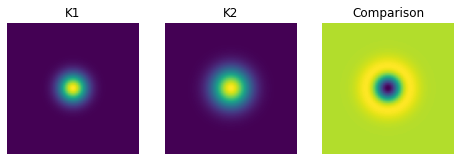

Erreur |K1 - K2|/ |K2| : 0.3500 


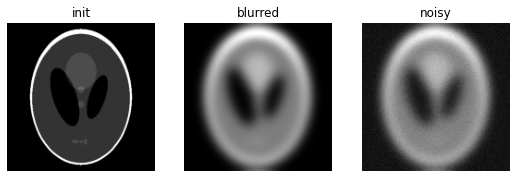

Erreur blurred |x_blurr- x_true|_2 :0.6363
Erreur |x_noisy - x_true|_2 :0.6376


In [2]:
K, K_shift, x_im, x_b, x_o1 = DataGen()

## Initialisation du noyau exacte - bruit std 0.05

Les erreurs initiales sont

$$
\begin{cases}
e_K = 0 \\
e_x = 0.2577
\end{cases}
$$

In [3]:
alpha = 100
mu    = 0.01
K_in   = K.copy()
x_in  = x_o1
# K_out,x_out,Ep,Ed = violetBD(K_in,x_in,x_b, alpha,mu,\
#                             niter=10000,coeffK=0.1)
# Display_ker(K_out,K_in,mysize=(8,4))
# Display_im(x_out,x_im,mysize=(10,5))
# Display_epd(Ep,Ed)

## Initialisation noyau proche - pas de bruit

In [16]:
alpha     = 100
mu        = 0.001
K_in      = K_shift.copy()
x_in      = x_b
K_out,x_out,Ep,Ed = violetBD(K_in,x_in,x_b,\
                            alpha,mu,\
                            niter=2000,coeffK=1,coeffx=1,\
                            proj_simplex=True)

iteration 40 %--- gradient K 1744.4609 --- gradient x 1.1109
iteration 80 %--- gradient K 1439.6675 --- gradient x 0.8693
iteration 120 %--- gradient K 1226.9544 --- gradient x 0.7287
iteration 160 %--- gradient K 1067.8725 --- gradient x 0.6266
iteration 200 %--- gradient K 937.2254 --- gradient x 0.5454
iteration 240 %--- gradient K 827.8090 --- gradient x 0.4789
iteration 280 %--- gradient K 734.0687 --- gradient x 0.4238
iteration 320 %--- gradient K 655.5147 --- gradient x 0.3786
iteration 360 %--- gradient K 589.2332 --- gradient x 0.3415
iteration 400 %--- gradient K 533.7207 --- gradient x 0.3108
iteration 440 %--- gradient K 486.8952 --- gradient x 0.2849
iteration 480 %--- gradient K 447.1849 --- gradient x 0.2630
iteration 520 %--- gradient K 413.3075 --- gradient x 0.2443
iteration 560 %--- gradient K 383.9902 --- gradient x 0.2281
iteration 600 %--- gradient K 358.2607 --- gradient x 0.2139
iteration 640 %--- gradient K 335.3634 --- gradient x 0.2012
iteration 680 %--- gra

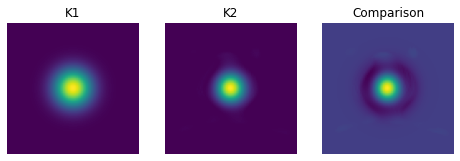

Erreur |K1 - K2|/ |K2| : 0.5248 


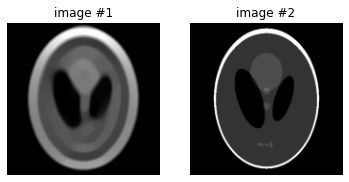

Erreur |im1 - im2|/|im2| :0.5321


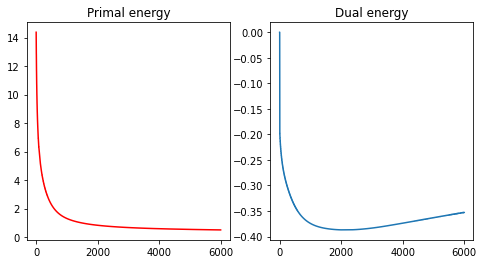

In [17]:
Display_ker(K_out,K_in,mysize=(8,4))
Display_im(x_out,x_im,mysize=(6,3))
Display_epd(Ep,Ed)

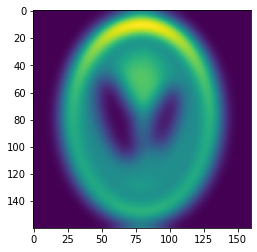

In [18]:
# # local parameters and matrix sizes
M,_    = K.shape
M      = M//2 # kernel middle size
Nx, Ny = x_b.shape # image size
# kernel position (for padding)
min_x  = Nx//2-M
max_x  = Nx//2+M
min_y  = Ny//2-M
max_y  = Ny//2+M
# Initialisation
Kk                          = np.zeros((Nx,Ny))
Kk[min_x:max_x,min_y:max_y] = K_out
plt.imshow(convolve(x_out,Kk))

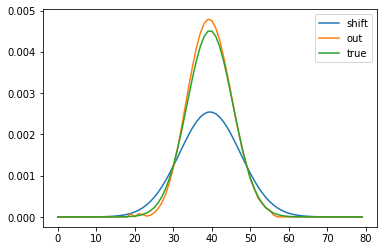

In [14]:
from Codes.simplex import Simplex
plt.plot(K_shift[40,:],label='shift')
plt.plot(K_out[40,:],label='out')
plt.plot(K[40,:],label='true')
plt.legend()

## Initialisation noyau proche - bruit std 0.05
Les erreurs initiales sont

$$
\begin{cases}
e_K=0.2811 \\
e_x=0.2724
\end{cases}
$$

In [20]:
alpha     = 100
mu        = 0.001
K_in      = K_shift.copy()
x_in      = x_o1
K_out,x_out,Ep,Ed = violetBD(K_in,x_in,x_o1,\
                            alpha,mu,\
                            niter=2000,coeffK=1,coeffx=1,\
                            proj_simplex=True)

iteration 40 %--- gradient K 1732.2918 --- gradient x 1.1067
iteration 80 %--- gradient K 1424.7578 --- gradient x 0.8651
iteration 120 %--- gradient K 1213.3796 --- gradient x 0.7262
iteration 160 %--- gradient K 1055.1102 --- gradient x 0.6258
iteration 200 %--- gradient K 926.8099 --- gradient x 0.5465
iteration 240 %--- gradient K 818.5631 --- gradient x 0.4816
iteration 280 %--- gradient K 725.3582 --- gradient x 0.4279
iteration 320 %--- gradient K 646.3786 --- gradient x 0.3834
iteration 360 %--- gradient K 580.4295 --- gradient x 0.3472
iteration 400 %--- gradient K 525.7461 --- gradient x 0.3175
iteration 440 %--- gradient K 479.6921 --- gradient x 0.2926
iteration 480 %--- gradient K 440.5625 --- gradient x 0.2716
iteration 520 %--- gradient K 406.9190 --- gradient x 0.2536
iteration 560 %--- gradient K 377.9118 --- gradient x 0.2381
iteration 600 %--- gradient K 352.7504 --- gradient x 0.2247
iteration 640 %--- gradient K 330.3841 --- gradient x 0.2127
iteration 680 %--- gra

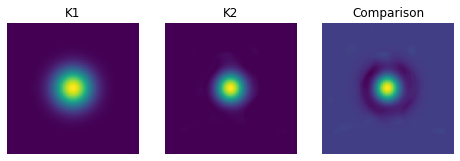

Erreur |K1 - K2|/ |K2| : 0.5194 


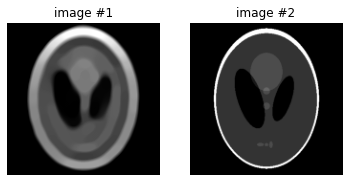

Erreur |im1 - im2|/|im2| :0.5328


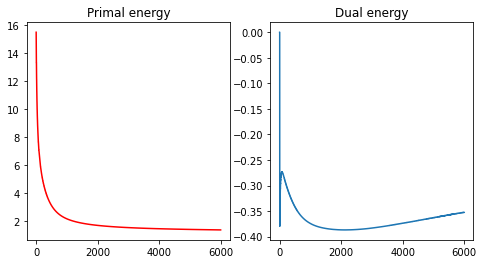

In [21]:
Display_ker(K_out,K_in,mysize=(8,4))
Display_im(x_out,x_im,mysize=(6,3))
Display_epd(Ep,Ed)

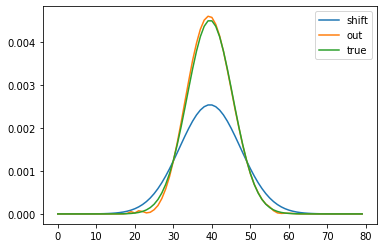

In [22]:
from Codes.simplex import Simplex
plt.plot(K_shift[40,:],label='shift')
plt.plot(K_out[40,:],label='out')
plt.plot(K[40,:],label='true')
plt.legend()

### ANNEXES

In [10]:
Nx,Ny = x_im.shape
# Kernel padding
K_pad = np.zeros(x_im.shape)
K_pad[Nx//2-M:Nx//2+M,Ny//2-M:Ny//2+M] = K
# Derivation padding
d      = -np.ones((3,3))
d[1,1] = 8
d_pad  = np.zeros((Nx,Ny))
d_pad[Nx//2-1:Nx//2+2,Ny//2-1:Ny//2+2] = d
# Parameters
alpha = 0
mu    = 0
gamma = 1
#
conv1 = convolve(K_pad,x_im)
conv2 = convolve(d_pad,K_pad)
ux,uy = nablah(x_im)
normu = np.abs(ux)+np.abs(uy)
#
Ep_b  = 0.5*gamma*np.linalg.norm(conv1-x_b)**2 \
          + 0.5*alpha*np.linalg.norm(conv2)**2\
          + mu/Nx/Ny*np.sum(normu)
Ep_o1  = 0.5*gamma*np.linalg.norm(conv1-x_o1)**2 \
          + 0.5*alpha*np.linalg.norm(conv2)**2\
          + mu/Nx/Ny*np.sum(normu)
print(" Min functionnal blurred : {:.6f},\
     \n Min functionnal noise   : {:.6f}".format(Ep_b,Ep_o1))

 Min functionnal blurred : 0.000000,     
 Min functionnal noise   : 0.869330
